<a target="_blank" href="https://colab.research.google.com/github/AsCiDEN/Tarea-3/blob/main/Tarea3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 3: Ajuste de modelos**

El objetivo de esta tarea es ajustar diferentes modelos a las curvas de rotación de galaxias y, evaluando con las métricas presentadas en clases, concluír que la materia oscura es capaz de explicar la fenomenología descrita por las observaciones.

## **¿Materia oscura o solo materia luminosa?**

La curva de rotación de una galaxia es la velocidad a la cual sus estrellas o gas rota en torno a su centro como función de la distancia. Asumiendo movimiento circular y la ley de Gravitación de Newton, se puede obtener la siguiente fórmula para la curva de rotación (o ecuación de movimiento):

\begin{equation}
\tag{1}
a_c(R) = \frac{v^2(R)}{R} = \frac{G M(r\leq R)}{R^2} \implies v(R) = \sqrt{\frac{GM(r\leq R)}{R}},
\end{equation}

donde  $G$ es la constante de gravitación universal, y
\begin{equation}
\tag{2}
M(R) = M(r\leq R)= 4\pi \int_{0}^R \rho(r)r^2 dr,
\end{equation}
es decir, es la masa encerrada en una esfera de radio $R$ para una densidad de masa volumétrica $\rho(r)$.

Bajo esta ecuación, si conocemos la curva de rotación $v(R)$ de una galaxia, podemos inferir su distribución de masa y vice versa.

Una forma de obtener $M(R)$ es asumiendo que la masa de las galaxias está dominada por su componente estelar, y por ende, que existe una relación de proporcionalidad entre perfil de masa galáctico y el perfil luminoso de cada galaxia, esto ha llevado a proponer perfiles de tipo exponenciales (o de Sérsic) de la forma:

\begin{equation}
\tag{3}
M_{star}(R, M_1, R_1) = M_1 \times \left[1 - \frac{\exp(-R/R_1)(R_1 + R)}{R_1} \right]
\end{equation}

Note que este perfil depende de dos parámetros que caracterizan la masa ($M_1$) y el tamaño típico ($R_1$) de la galaxia de estudio.

**P1)**
1.   Para esta parte de la tarea será necesario trabajar con unidades, en particular, para distancias galácticas la unidad más típica es el kilo-parsec. Defina que es un kilo-parsec (kpc) y muestre su equivalencia en metros. ¿Cuántos planeta Tierra puede colocar uno al lado del otro dentro de 1 kpc de distancia?

**Respuesta:** Se entiende la unidad de medida parsec como la distancia desde la que habría que observar el sistema solar para que la órbita terrestre subtendiera un segundo de arco donde $1pc=3,086 \times 10^{16}m$, por lo tanto $1kpc=3,086 \times 10^{19}m$.

Tomando el diametro de la Tierra como $12,742 \times 10^3m$, con un calculo rapido tenemos que se podrían colocar aprox $2,42 \times 10^{12}$ planetas tierra en una unidad de kilo-parsec
2. Grafique la curva de velocidad $v(R)$ para la distribución de masa dada en la ecuación (3). Para ello considere $M_1 = 10^{10} M_{\odot}$ y $R_1 = 5 $ kpc, donde $M_\odot \approx 1.989\times 10^{30}$ kg es la masa del sol.

**Nota:** Para esta tarea puede utilizar el módulo [astropy.units](https://docs.astropy.org/en/stable/units/) para lidiar fácilmente con las unidades. Esto es completamente opcional, no se asignará puntaje extra si es que lo hacen, pero puede investigarlo si así lo desea. Tampoco se descontará en caso contrario.

In [308]:
import numpy as np
import matplotlib.pyplot as plt
G = 6.67e-11 # constante de gravitación universal en unidades de m^3 kg^-1 s^-2
kpc_to_m = 3.086*10**19 # rellene con el valor de 1 kpc en metros
solar_masses_to_kg = 1.989e30 # 1 masa solar en kg
M1 = 10**10 * solar_masses_to_kg
R1 = 5 * kpc_to_m

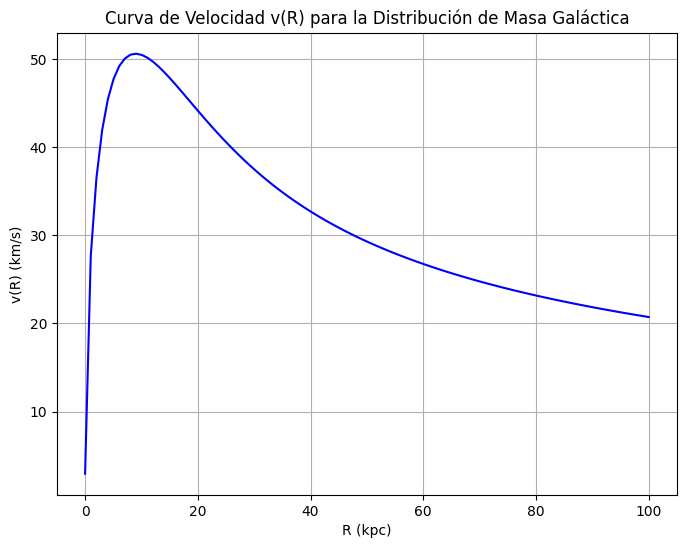

In [309]:
# Cree la función M_star(R, M_1, R_1) según la ecuación (1)

def M_star(R, M_1, R_1):
  return M_1 * (1 - np.exp(-R / R_1) * (R_1 + R) / R_1)

# Cree la función v_R_stars(R, M1, R1) utilizando la ec. (3) en (1). v(R) debe tener unidades de km/s
# Tenga cuidado con las unidades, como referencia la velocidad debería quedar entre ~10-50 km/s
def v_R_stars(R, M_1, R_1):
  # Nos aseguramos de que R no sea cero para evitar división por cero
  R = np.maximum(R, 1e-10)
  return np.sqrt(G * M_star(R, M_1, R_1) / R)/1000

# Cree el arreglo "R", con distancias desde 0.01 a 100 kpc de forma equiespaciada con 100 elementos.
R = np.linspace(0.01, 100, 100)
R_m = R * 3.086e19
# Calcule v(R) en km/s colocando la ecuación (3) en (1) y haga el gráfico correspondiente
v_r_stars = v_R_stars(R_m, M1, R1)

# Haga el gráfico :)
# No olvide en cada eje indicar las unidades.

plt.figure(figsize=(8, 6))
plt.plot(R, v_r_stars, color='blue')
plt.xlabel('R (kpc)')
plt.ylabel('v(R) (km/s)')
plt.title('Curva de Velocidad v(R) para la Distribución de Masa Galáctica')
plt.grid(True)
plt.show()

3. ¿Qué puede decir del comportamiento de $v(R)$ para $R \gg R_1$? Aproxime $M(R)$ en dicho caso e indique la forma que tendrá $v(R)$.

**Respuesta:** Se puede ver que para valores muy grandes de $R$ la función $v(R)$ tendrá un comportamiento decreciente con una forma que se podría describir como el cuociente de una raíz. En este caso $M(R)$ se va a aproximar eventualmente a la constante $M_1$.

Con $M$ constante Y $R$ muy grande se tendría que la función $v(R)$ se podría aproximar a la expresión $\frac{1}{\sqrt{R}}$

 Note que dicha curva tiene la misma forma que la [curva de rotación de los planetas en el sistema solar!](https://sites.temple.edu/profnewby/2019/05/04/solar-system-rotation-curve/)

En 1978, la astrónoma Vera Rubin descubrió que, para distancias grandes, la curva de rotación no seguía la forma predicha por los típicos perfiles de masa (como aquel que usted describió en la parte anterior).

Una forma de resolver este misterio es incorporando un segundo elemento que está aportando de forma considerable a la distribución de materia, pero que aparentemente no emite ni absorbe nada de luz, apodado como **materia oscura**.

En 1997, Julio Navarro, Carlos Frenk y Simon White publicaron [un artículo científico](https://iopscience.iop.org/article/10.1086/304888/pdf) en el cual proponían un perfil de densidad $\rho(r)$ para la materia oscura a partir de resultados de simulaciones numéricas. Este perfil de densidad permite obtener la masa encerrada en un radio $R$ de la forma:

\begin{equation}
\tag{4}
M_{dm}(R, M_0, R_0) = M_0 \times \left[\ln\left(\frac{R_0 + R}{R_0}\right)  + \frac{R_0}{R_0 + R} - 1\right]
\end{equation}

4. Añada al gráfico anterior la curva de rotación dada por perfil de la ecuación (4) considerando $M_0 = 5\times 10^{10} M_{\odot}$, y $R_0 = 20$ kpc, recuerde añadir una leyenda adecuada que permita identificar ambos perfiles.


In [310]:
# Constantes
M0 = 5e10 * solar_masses_to_kg
R0 = 20 * 3.086e19

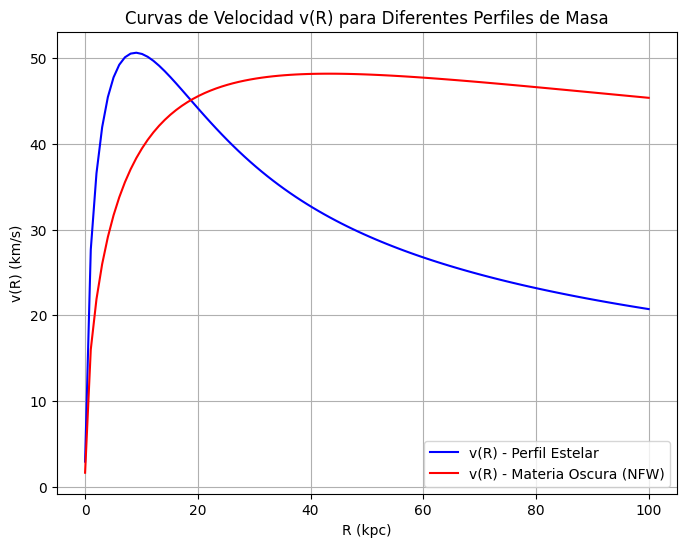

In [311]:
# Parta por definir la función M_dm(R, M0, R0) tal como se definió en la ec. (4)
def M_dm(R, M0, R0):
  R = np.maximum(R, 1e-10)  # Evitamos valores cercanos a cero
  return M0 * (np.log((R0 + R) / R0) + R0 / (R0 + R) - 1)

# Cree la función v_R_dm(R, M0, R0) utilizando la ec. (4) en (1). v(R) debe tener unidades de km/s
def v_R_dm(R, M0, R0):
  # Nos aseguramos de que R no sea cero para evitar división por cero
  R = np.maximum(R, 1e-10)
  return np.sqrt(G * M_dm(R, M0, R0) / R) / 1000

# Utilice el mismo arreglo R de la parte anterior.
# Repita el cálculo de v(R) pero para el perfil de la ecuación (4)
# No olvide graficar ambas curvas de rotación y colocar una leyenda.

v_r_stars = v_R_stars(R_m, M1, R1)
v_r_dm = v_R_dm(R_m, M0, R0)

# Gráfico:
plt.figure(figsize=(8, 6))
plt.plot(R, v_r_stars, color='blue', label='v(R) - Perfil Estelar')
plt.plot(R, v_r_dm, color='red', label='v(R) - Materia Oscura (NFW)')
plt.xlabel('R (kpc)')
plt.ylabel('v(R) (km/s)')
plt.title('Curvas de Velocidad v(R) para Diferentes Perfiles de Masa')
plt.grid(True)
plt.legend()
plt.show()

5. ¿Qué componente parece dominar a distancias cortas? ¿Cuál a distancias largas?

**Respuesta (corta):** A distancias cortas domina el perfil estelar, mientras que para distancias largas la materia oscura domina.

Es razonable pensar que uno necesita tanto el componente deducido por la masa estelar (o luminosa) como aquella que no interactúa con la luz (materia oscura), por lo que un perfil de masa más completo involucra una suma de cada componente tal como se describe en la siguiente ecuación:

\begin{equation}
\tag{5}
M_{tot}(R, M_0, R_0, M_1, R_1 ) =  M_{dm}(R,M_0, R_0) + M_{star}(R, M_1, R_1)
\end{equation}

Ahora analizaremos la curva de rotación de la [galaxía NGC 6503](https://es.wikipedia.org/wiki/NGC_6503), para ello cargaremos el archivo **velocity_curve_NGC6503.txt**.

Las columnas del archivo tienen la siguiente información, distancia del centro (en kpc), velocidad medida (en km/s) y el error estándar en la medición (en km/s).

In [312]:
# Partiremos por "montar" el drive, esto permite que podamos leer los archivos de nuestro drive
from google.colab import drive
drive.mount('/content/drive')    # se les debe abrir una pestaña extra pidiendo permisos

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [313]:
# Encuentren la ruta de su archivo, para ello puede utilizar la barra de herramientas izquierda
# lleguen a su archivo desde su "drive" y con el click derecho "copiar ruta" y luego la pegan
# como un string en la siguiente variable.
path_archivo = '/content/drive/MyDrive/CD2201-16/Tarea3/velocity_curve_NGC6503.txt'
datos = np.loadtxt(path_archivo)

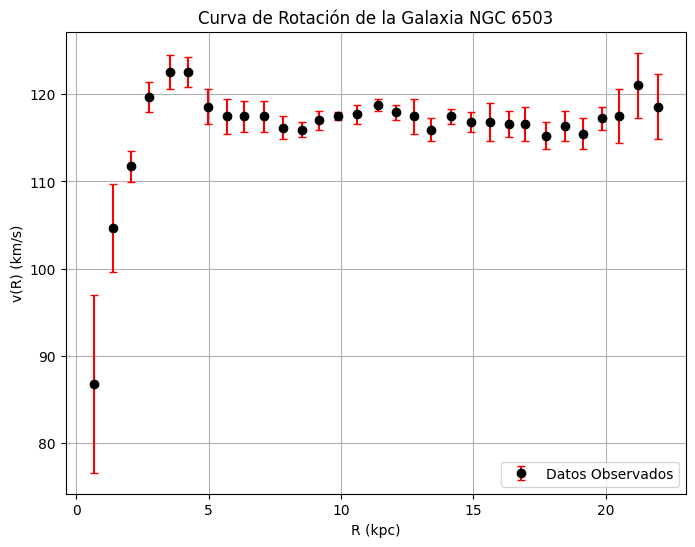

In [314]:
# Haga un gráfico de la curva de rotación incluyendo barras de error con plt.errorbar
# No olvide añadir todo lo esencial de un gráfico y que los errores se vean de forma clara.
# Para mejor claridad cuando comparemos con modelos, haga que los puntos NO estén conectados por alguna línea.

# Separamos las columnas en variables individuales
R_obs = datos[:, 0]  # Distancia del centro (en kpc)
v_obs = datos[:, 1]  # Velocidad medida (en km/s)
error_v = datos[:, 2]  # Error estándar en la medición (en km/s)

# Creamos el gráfico con barras de error
plt.figure(figsize=(8, 6))
plt.errorbar(R_obs, v_obs, yerr=error_v, fmt='o', color='black', ecolor='red', capsize=3, label='Datos Observados')
plt.xlabel('R (kpc)')
plt.ylabel('v(R) (km/s)')
plt.title('Curva de Rotación de la Galaxia NGC 6503')
plt.grid(True)
plt.legend()
plt.show()

Ajustaremos 3 modelos de curva de rotación para esta galaxia.

1. Solo componente estelar.
2. Solo materia oscura.
3. Componente estelar y materia oscura.

¿Es este un problema de ajuste de modelos lineal o no-lineal?

**Respuesta (una o dos palabras):** No-lineal

In [315]:
# Importamos curve_fit que se encargará de hacer el ajuste.
from scipy.optimize import curve_fit

In [316]:
# Escriba la función v_R_tot(R, M0, R0, M1, R1) que utiliza M_tot descrito en la ecuación (5).
# Hint: puede directamente construir esta ecuación con v_R_dm y v_R_stars, le puede ahorrar errores.

def v_R_tot(R, M0, R0, M1, R1):
  return np.sqrt(v_R_stars(R, M1, R1)**2 + v_R_dm(R, M0, R0)**2)

# Utilice curve_fit para ajustar los 3 modelos antes mencionados. Incluya los errores.
# Para las condiciones iniciales, considere masas entre 1e10 a 1e11 masas solares, y radios entre 1 a 20 kpc.
# Rellene según corresponda, ignore las variables "pcov"

# Convertimos R_obs a metros para el ajuste
R_obs_m = R_obs * kpc_to_m

# Rango para ajuste
R_fit = np.linspace(min(R_obs), max(R_obs), 1000)
R_fit_m = R_fit * kpc_to_m

# Ajuste del modelo estelar
popt_stars, pcov_stars = curve_fit(lambda R, M_1, R_1: v_R_stars(R * kpc_to_m, M_1, R_1), R_obs, v_obs, sigma=error_v, p0=[1e10 * solar_masses_to_kg, 5 * kpc_to_m])

# Ajuste del modelo de materia oscura
popt_dm, pcov_dm = curve_fit(lambda R, M0, R0: v_R_dm(R * kpc_to_m, M0, R0), R_obs, v_obs, sigma=error_v, p0=[1e10 * solar_masses_to_kg, 20 * kpc_to_m])

# Ajuste combinado
popt_tot, pcov_tot = curve_fit(lambda R, M0, R0, M1, R1: v_R_tot(R * kpc_to_m, M0, R0, M1, R1), R_obs, v_obs, sigma=error_v, p0=[1e10 * solar_masses_to_kg, 20 * kpc_to_m, 1e10 * solar_masses_to_kg, 5 * kpc_to_m])

# Calculamos las curvas ajustadas para el rango de ajuste
v_r_stars = v_R_stars(R_fit_m, *popt_stars)
v_r_dm = v_R_dm(R_fit_m, *popt_dm)
v_r_tot = v_R_tot(R_fit_m, *popt_tot)

<ipython-input-311-f6f6e3a1d188>:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(G * M_dm(R, M0, R0) / R) / 1000
<ipython-input-311-f6f6e3a1d188>:4: RuntimeWarning: invalid value encountered in log
  return M0 * (np.log((R0 + R) / R0) + R0 / (R0 + R) - 1)
<ipython-input-309-1dbe1b6a662f>:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(G * M_star(R, M_1, R_1) / R)/1000


In [317]:
# Mostramos los valores óptimos de los parámetros
print("Parámetros del Modelo Estelar Ajustado:")
print("Masa estelar (kg):", popt_stars[0])
print("Radio estelar (m):", popt_stars[1])

print("\nParámetros del Modelo de Materia Oscura Ajustado:")
print("Masa de materia oscura (kg):", popt_dm[0])
print("Radio de materia oscura (m):", popt_dm[1])

print("\nParámetros del Modelo Combinado Ajustado:")
print("Masa de materia oscura (kg):", popt_tot[0])
print("Radio de materia oscura (m):", popt_tot[1])
print("Masa estelar (kg):", popt_tot[2])
print("Radio estelar (m):", popt_tot[3])

Parámetros del Modelo Estelar Ajustado:
Masa estelar (kg): 1.1120012400828918e+41
Radio estelar (m): 1.492305214104619e+20

Parámetros del Modelo de Materia Oscura Ajustado:
Masa de materia oscura (kg): 1.8202345835894933e+46
Radio de materia oscura (m): -1.2570359196180838e+23

Parámetros del Modelo Combinado Ajustado:
Masa de materia oscura (kg): 3.73153079165151e+45
Radio de materia oscura (m): -8.976476566414401e+22
Masa estelar (kg): 4.396763592311924e+40
Radio estelar (m): 6.794370126073591e+19


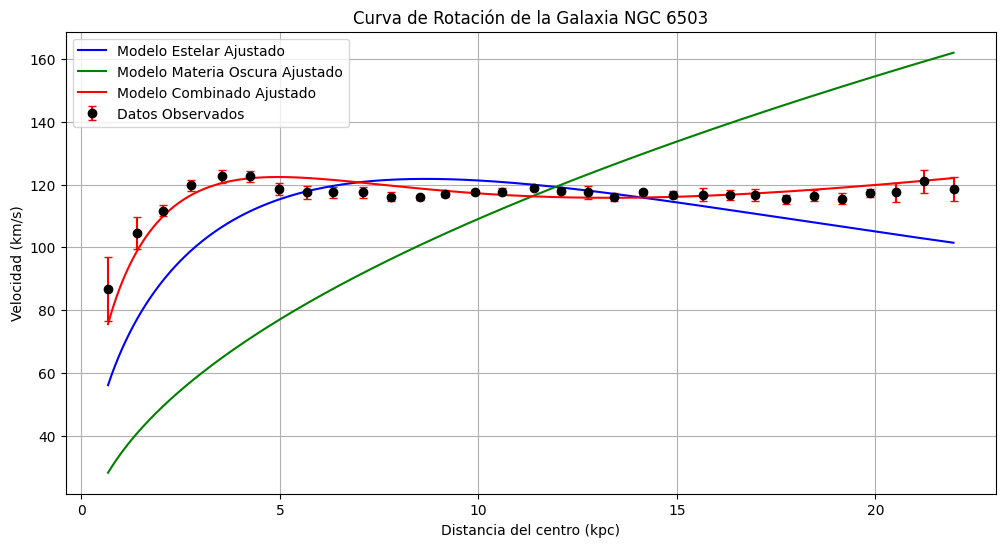

In [318]:
# En el gráfico de los datos, añada los 3 modelos con los parámetros óptimos encontrados en la parte anterior.
# No olvide añadir una leyenda adecuada.

# Graficamos datos observados y modelos ajustados
plt.figure(figsize=(12, 6))

# Gráfico de los datos observados con barras de error
plt.errorbar(R_obs, v_obs, yerr=error_v, fmt='o', color='black', ecolor='red', capsize=3, label='Datos Observados')
plt.plot(R_fit, v_r_stars, color='blue', label='Modelo Estelar Ajustado')
plt.plot(R_fit, v_r_dm, color='green', label='Modelo Materia Oscura Ajustado')
plt.plot(R_fit, v_r_tot, color='red', label='Modelo Combinado Ajustado')

plt.xlabel('Distancia del centro (kpc)')
plt.ylabel('Velocidad (km/s)')
plt.title('Curva de Rotación de la Galaxia NGC 6503')
plt.grid(True)
plt.legend()
plt.show()

Evaluaremos cada modelo con la métrica $\chi ^2$ definida como:

$$\chi ^2 = \sum_{i=1}^N \frac{(y_i - v_R(x_i))^2}{\sigma_i^2}, $$

donde $y_i$ es el dato de la velocidad de rotación en la distancia $x_i$, cuyo error de medición es $\sigma_i$ y $v_R$ es el modelo respectivo.


In [319]:
# Para evaluar las métricas necesita primero evaluar su modelo en cada x_i
pred_tot = v_R_tot(R_obs * kpc_to_m, *popt_tot)
pred_dm = v_R_dm(R_obs * kpc_to_m, *popt_dm)
pred_stars = v_R_stars(R_obs * kpc_to_m, *popt_stars)

# Defina la función chi_cuadrado(datos, sigma, pred), donde datos, sigma y pred
# son arreglos de igual largo que contienen los datos y_i, los errores sigma_i y
# la predicción de algún modelo.
# Esto se puede hacer en 1 línea con arreglos de numpy :)

def chi_cuadrado(datos, sigma, pred):
  return np.sum(((datos - pred) / sigma) ** 2)

# Haga un print reportando el chi-cuadrado de cada modelo. Rellene según corresponda.

print('Chi-cuadrado (dm+stars): ', chi_cuadrado(v_obs, error_v, pred_tot))
print('Chi-cuadrado (dm-only): ', chi_cuadrado(v_obs, error_v, pred_dm))
print('Chi-cuadrado (stars-only): ', chi_cuadrado(v_obs, error_v, pred_stars))

Chi-cuadrado (dm+stars):  81.42154785699655
Chi-cuadrado (dm-only):  9962.212552626834
Chi-cuadrado (stars-only):  853.3934033886777


**Responda:**
1. ¿Qué modelo ajusta mejor los datos bajo la métrica anterior? ¿El peor?

El modelo combinado es el que mejor se ajusta a los datos observados ya que tiene el valor asociado a $χ^2$, por razones opuestamente analogas el modelo que solo considera la materia oscura tiene el peor ajuste (esto se puede notar en el grafico hecho)

2. ¿Qué puede concluír de los constituyentes de la galaxia NGC6503?

Se puede concluir que esta galaxia contiene tanto estrellas como materia oscura, las cuales ambas son necesarias para poder describir la dinamica rotacional de esta con una exactitud adecuada.

## **¿Cuántos parámetros utilizo?**

En el problema anterior el modelo que utilizamos tenía una motivación física, no estaba escogido "al azar". En esta parte trataremos de modelar algo del cual no tenemos una motivación física para proponer un modelo, en estos casos siempre debe primar el utilizar modelos sencillos por sobre modelos de alta complejidad o con muchos parámetros. En particular, ajustaremos polinomios de distinto grado y determinaremos el grado óptimo del modelo tal que su capacidad predictiva no se vea alterada.

Partiremos por generar los datos.

Considere la siguiente función:

$$f(x) = 5\sin(x) + 5\cos(x^2) + 3$$

Le añadiremos ruido utilizando una distribución normal $N(\mu= 0, \sigma=2)$.

In [320]:
np.random.seed(123)  # investigue que hace esta línea de código

**Responda:**
- ¿Qué hace la línea de código anterior? ¿Por qué es una buena práctica utilizar una "semilla" cuando se realizan experimentos aleatorios?

La linea de codigo anterior genera una semilla para un generador de numeros aleatorios en Python, esto tiene la ventaja de poder hacer procesos reproducibles con numeros aleatorios y también la clara ventaja de poder hacer mediciones y documentaciones de manera más optima de procesos los cuales usaran cierta aleatoriedad, esto al poder estudiar cada caso en profundidad si fuese necesario.

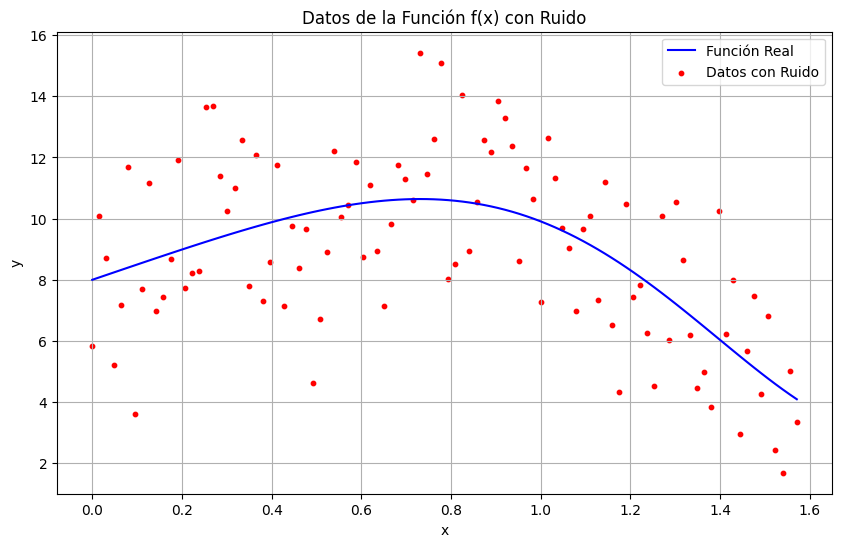

In [321]:
N_data = 100
x = np.linspace(0,np.pi/2, N_data)

# Calcule un arreglo con los valores de la función f(x) con el arreglo antes definido
def f(x):
    return 5 * np.sin(x) + 5 * np.cos(x**2) + 3
y_real = f(x)

# Ahora sume el "ruido" aleatorio. Para ello utilice np.random.normal()
# Revise la documentación y utilice una desviación estándar igual a 2

y_ruido = y_real + np.random.normal(0, 2, N_data)

# Visualice sus datos :)
# Puede graficar la función sin ruido si así lo desea. (opcional)

plt.figure(figsize=(10, 6))
plt.plot(x, y_real, label='Función Real', color='blue')
plt.scatter(x, y_ruido, color='red', label='Datos con Ruido', s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos de la Función f(x) con Ruido')
plt.legend()
plt.grid(True)
plt.show()

Ahora, de forma similar a lo visto en clases, haremos un ajuste con modelos polinomiales y, utilizando cross-validation, determinaremos el grado del polinomio óptimo a modo de favorecer la capacidad predictiva del modelo.

In [322]:
# Importamos los esenciales :)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [323]:
# En la siguiente variable guardaremos el error asociado a los modelos
# Exploraremos polinomios de grado 1 hasta 10, cada fila estará asociada a un modelo
# distinto y las columnas a alguna iteración de cross-validation

N_iteraciones  = 100
errores_modelos = np.zeros((10, N_iteraciones))

Ahora, repita el siguiente experimento para realizar cross-validation. Para cada iteración debe hacer lo siguiente:

- Divida el dataset en entrenamiento y testeo (use una proporción adecuada). Utilice la función train_test_split!
- Con el set de entrenamiento ajuste el modelo polinomial (desde el grado 1 al 10). Puede utilizar PolynomialFeatures para generar la matriz de diseño que necesite, use include_bias=True.  
- Evalúe su modelo en los datos de testeo y utilice las predicciones para evaluar el mean_squared_error.
- Guarde el MSE en la matriz de errores.

In [324]:
# Generar datos
np.random.seed(123)  # Para reproducibilidad
x = np.linspace(0, np.pi/2, N_data).reshape(-1, 1)  # Convertir a columna
y_real = f(x.flatten())
y_ruido = y_real + np.random.normal(0, 2, N_data)

for i in range(100):
  # Rellene según corresponda
  x_train, x_test, y_train, y_test = train_test_split(x, y_ruido, test_size=0.2, random_state=i)
  for j in range(10):
      # Aquí puede iterar para cada modelo o grado del polinomio :) (cuidado que j parte siendo 0)
      poly = PolynomialFeatures(degree=j, include_bias=True)
      x_train_poly = poly.fit_transform(x_train)
      x_test_poly = poly.transform(x_test)

      # Ajustar el modelo
      model = LinearRegression()
      model.fit(x_train_poly, y_train)

      # Hacer predicciones
      y_pred = model.predict(x_test_poly)

      # Calcular el MSE y guardar en la matriz de errores
      mse = mean_squared_error(y_test, y_pred)
      errores_modelos[j-1, i] = mse

Finalmente, grafique el MSE promedio de las N iteraciones, para cada modelo y decida cuál es el grado óptimo del polinomio que debería utilizar para su modelo.

In [327]:
# Note que para calcular el promedio pedido puede utilizar np.mean(errores_modelos, axis=1) ¿qué hace el parámetro axis=1?

# El parametro axis=1 indica que se calcula el promedio de cada fila de un array.

# Promediamos los errores para cada grado
mse_promedio = np.mean(errores_modelos, axis=1)

# Mostrar resultados
for j in range(10):
    print(f'Grado {j+1}: MSE Promedio = {mse_promedio[j]}')

# Datos de MSE promedio para cada grado de polinomio
grados = np.arange(1, 11)  # Grados de 1 a 10
mse_promedio = np.array([
    7.980307174153685,  # Grado 1
    5.455040977231778,  # Grado 2
    5.534705986535076,  # Grado 3
    5.646980476354191,  # Grado 4
    5.674635538250962,  # Grado 5
    5.816936971995033,  # Grado 6
    5.759719387242278,  # Grado 7
    5.73620057910577,   # Grado 8
    5.953736837179512,  # Grado 9
    8.760914989837596   # Grado 10
])

Grado 1: MSE Promedio = 7.980307174153685
Grado 2: MSE Promedio = 5.455040977231778
Grado 3: MSE Promedio = 5.534705986535076
Grado 4: MSE Promedio = 5.646980476354191
Grado 5: MSE Promedio = 5.674635538250962
Grado 6: MSE Promedio = 5.816936971995033
Grado 7: MSE Promedio = 5.759719387242278
Grado 8: MSE Promedio = 5.73620057910577
Grado 9: MSE Promedio = 5.953736837179512
Grado 10: MSE Promedio = 8.760914989837596


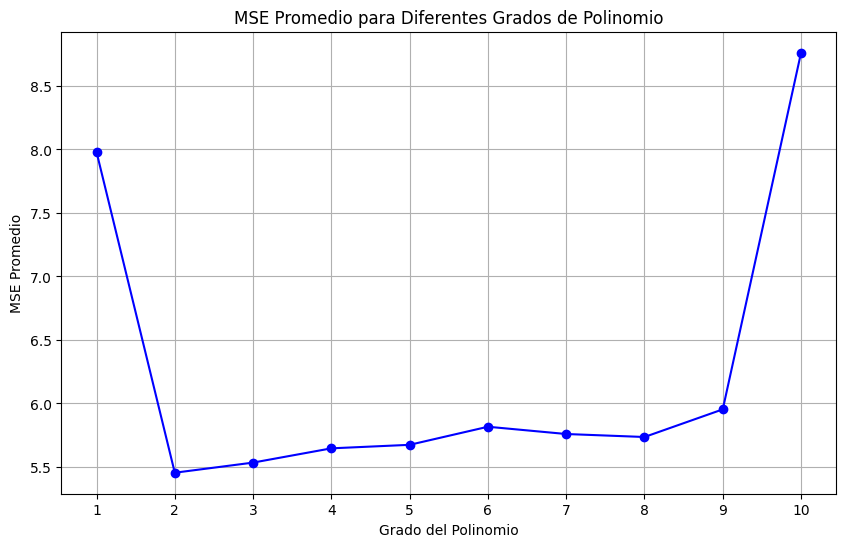

In [328]:
# Añadimos el grafico final.
plt.figure(figsize=(10, 6))
plt.plot(grados, mse_promedio, marker='o', linestyle='-', color='b')
plt.xlabel('Grado del Polinomio')
plt.ylabel('MSE Promedio')
plt.title('MSE Promedio para Diferentes Grados de Polinomio')
plt.grid(True)
plt.xticks(grados)  # Mostrar cada grado en el eje x
plt.show()

El grado óptimo del polinomio es el grado 2, ya que este tiene el MSE promedio más bajo, lo cual significa que es el grado optimo para este modelo estudiado.